# Introduction

This notebook analyzes used car sales data in Egypt. The dataset includes information about the make, model, price, mileage, and other features of cars listed for sale. The goal of this analysis is to explore patterns and trends in the data, including the distribution of prices, the popularity of different car brands, and the relationship between price and mileage.

![Image](used-cars.jpeg)

Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.style.use('ggplot')

In [2]:
# Load the dataset
df = pd.read_csv("/kaggle/input/used-cars-for-sale-in-egypt/hatla2ee_scraped_data.csv")
df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,"2,800,000 EGP",Dark grey,300 Km,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
1,Chery Arrizo 5 2022,NaN,Bronze,"86,000 Km",Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...
2,Fiat Tipo 2021,"1,200,000 EGP",Petroleum,"131,000 Km",Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,"2,050,000 EGP",Black,"125,000 Km",Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,"2,050,000 EGP",Gray,"84,000 Km",BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123


# Data Cleaning and Preprocessing

In [3]:
# Convert Mileage column to numeric
df['Mileage'] = df['Mileage'].str.replace(' Km', '').str.replace(',', '').astype(float)

# Convert Price column to numeric
df['Price'] = df['Price'].str.replace(' EGP', '').str.replace(',', '').astype(float)

# Conver Date Displayed column to datetime
df['Date Displayed'] = pd.to_datetime(df['Date Displayed'])

In [4]:
df['Date Displayed'] = pd.to_datetime(df['Date Displayed'])

In [5]:
df.head()

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
0,Kia Sportage 2024,2800000.0,Dark grey,300.0,Kia,Sportage,Tagamo3 - New Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/kia/sportage/62...
1,Chery Arrizo 5 2022,NaN,Bronze,86000.0,Chery,Arrizo 5,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/chery/Arrizo-5/...
2,Fiat Tipo 2021,1200000.0,Petroleum,131000.0,Fiat,Tipo,Kafr el-Dawwar,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/fiat/tipo/6286701
3,Hyundai Tucson Turbo GDI 2021,2050000.0,Black,125000.0,Hyundai,Tucson Turbo GDI,Nasr city,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/hyundai/Tucson-...
4,BMW X1 2018,2050000.0,Gray,84000.0,BMW,X1,Cairo,2024-02-16,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/bmw/x1/6254123


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33559 entries, 0 to 33558
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Name                    33559 non-null  object        
 1   Price                   32625 non-null  float64       
 2   Color                   33559 non-null  object        
 3   Mileage                 31440 non-null  float64       
 4   Make                    33559 non-null  object        
 5   Model                   33559 non-null  object        
 6   City                    33559 non-null  object        
 7   Date Displayed          33559 non-null  datetime64[ns]
 8   Automatic Transmission  33559 non-null  object        
 9   Air Conditioner         33559 non-null  object        
 10  Power Steering          33559 non-null  object        
 11  Remote Control          33559 non-null  object        
 12  Item URL                33559 non-null  object

In [7]:
df.isnull().sum()

Name                         0
Price                      934
Color                        0
Mileage                   2119
Make                         0
Model                        0
City                         0
Date Displayed               0
Automatic Transmission       0
Air Conditioner              0
Power Steering               0
Remote Control               0
Item URL                     0
dtype: int64

In [8]:
# Drop rows where the price is NaN
df.dropna(subset=['Price', ], inplace=True)

In [9]:
# Fill missing values in the 'Mileage' column with the mean
mean_mileage = df['Mileage'].mean()
df['Mileage'].fillna(mean_mileage, inplace=True)

/tmp/ipykernel_18/370670303.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Mileage'].fillna(mean_mileage, inplace=True)


In [10]:
# Make a funtion that displays a horizontal bar plot with labels
def horizontal_bar_plot_with_labels(data, xlabel, ylabel, title, color='#265073', fontsize=10, label_color='black'):
    """
    Generate a horizontal bar plot with data labels.
    
    Parameters:
    - data: The data to plot.
    - xlabel: The label for the x-axis.
    - ylabel: The label for the y-axis.
    - title: The title of the plot.
    - color: The color of the bars (default is '#265073').
    - fontsize: Font size for the data labels (default is 10).
    - label_color: Color for the data labels (default is black).
    """
    # Create a horizontal bar plot
    plt.figure(figsize=(12, 4))
    bars = plt.barh(data.index, data.values, color=color)

    # Add data labels using the function
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 5, bar.get_y() + bar.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=fontsize, color=label_color)

    # Customize plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Exploratory Data Analysis

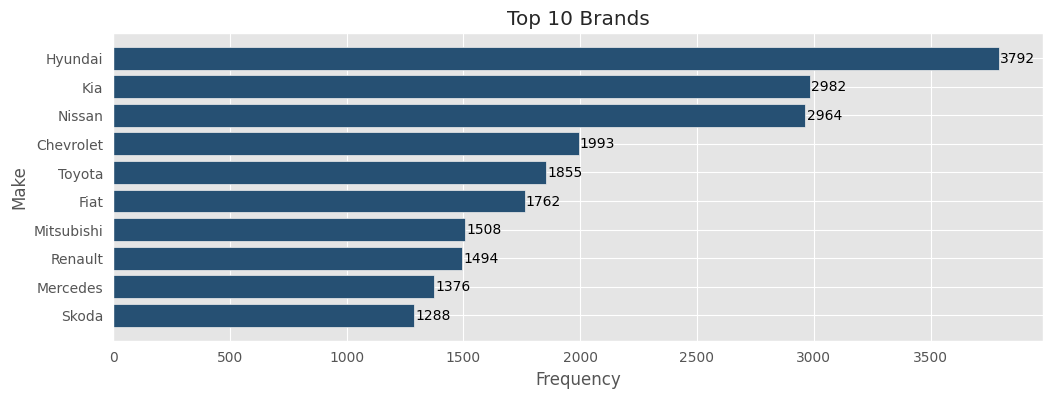

In [11]:
# Plot the top 10 brands
top_brands = df['Make'].value_counts().head(10).iloc[::-1]
horizontal_bar_plot_with_labels(top_brands, xlabel='Frequency', ylabel='Make', title='Top 10 Brands', color='#265073')

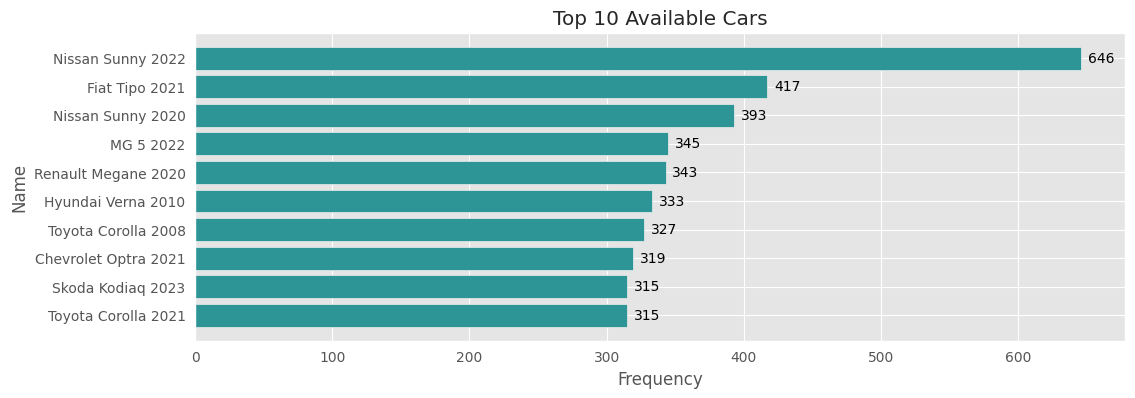

In [12]:
# Plot the top 10 available cars
top_available_cars = df['Name'].value_counts().head(10).iloc[::-1]
horizontal_bar_plot_with_labels(top_available_cars, xlabel='Frequency', ylabel='Name', title='Top 10 Available Cars', color='#2D9596')

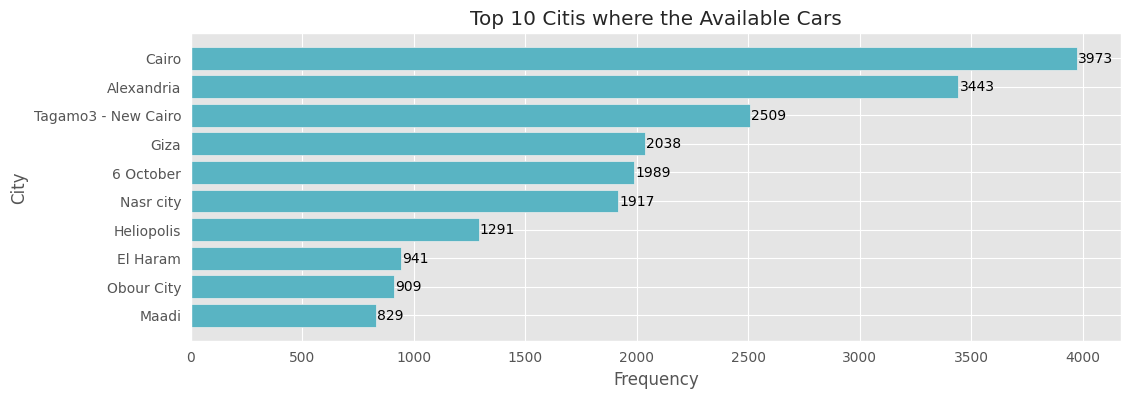

In [13]:
# Plot the top 10 citis where the cars are available
top_citis = df['City'].value_counts().head(10).iloc[::-1]
horizontal_bar_plot_with_labels(top_citis, xlabel='Frequency', ylabel='City', title='Top 10 Citis where the Available Cars', color='#59B4C3')

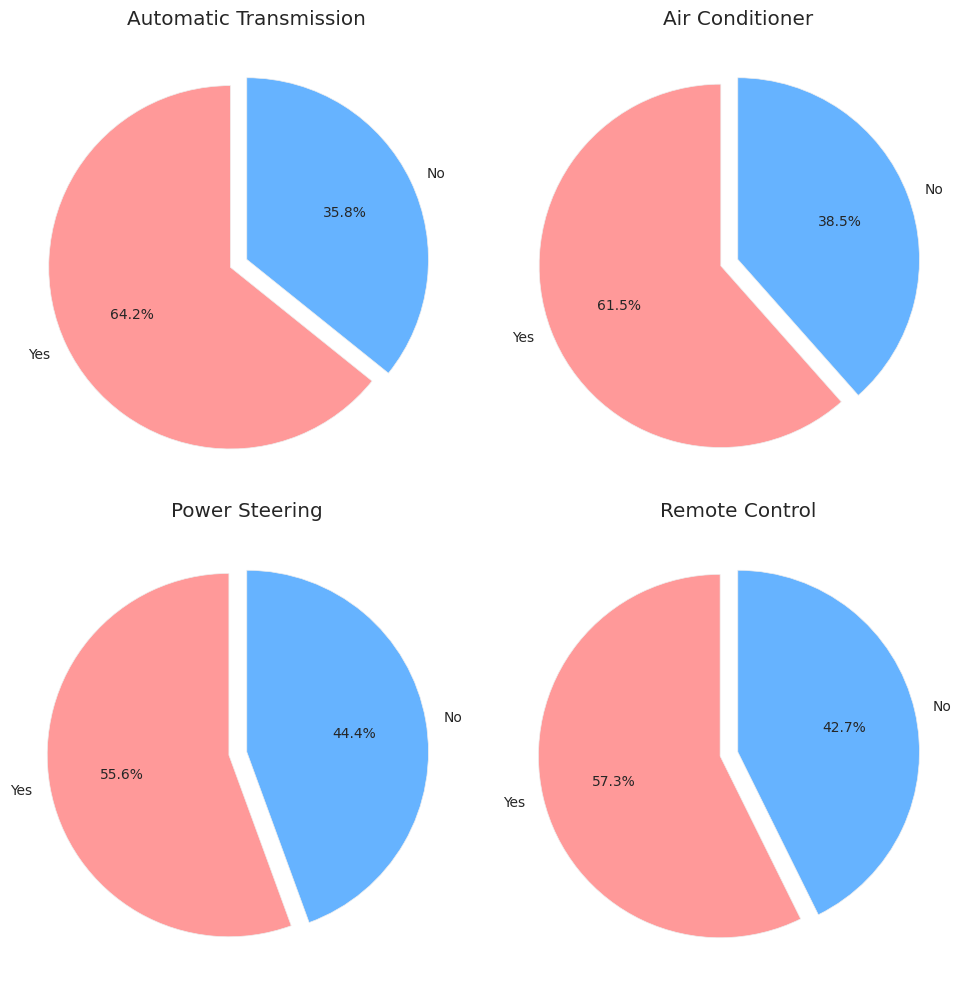

In [14]:
# Data
labels = ['Yes', 'No']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.1, 0)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot for Automatic Transmission
axs[0, 0].pie(df['Automatic Transmission'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
axs[0, 0].set_title('Automatic Transmission')

# Plot for Air Conditioner
axs[0, 1].pie(df['Air Conditioner'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
axs[0, 1].set_title('Air Conditioner')

# Plot for Power Steering
axs[1, 0].pie(df['Power Steering'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
axs[1, 0].set_title('Power Steering')

# Plot for Remote Control
axs[1, 1].pie(df['Remote Control'].value_counts(), labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)
axs[1, 1].set_title('Remote Control')

plt.tight_layout()
plt.show()

In [15]:
# Display the data of the 10 expensive cars
expensive_cars = df.sort_values(by='Price', ascending=False).head(10)
expensive_cars

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
9643,Mercedes G Class 2023,20000000.0,Olive,151166.846567,Mercedes,G Class,Tagamo3 - New Cairo,2023-12-19,Yes,No,No,No,https://eg.hatla2ee.com/en/car/mercedes/g-clas...
442,McLaren GT 2023,20000000.0,Blue,151166.846567,McLaren,GT,Tagamo3 - New Cairo,2024-02-16,Yes,No,No,No,https://eg.hatla2ee.com/en/car/mclaren/mclaren...
2504,Mercedes G Class 2022,16250000.0,Gray,9000.000000,Mercedes,G Class,Tagamo3 - New Cairo,2024-02-10,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/mercedes/g-clas...
7198,Land Rover Range Rover Vogue 2024,16000000.0,Black,1.000000,Land Rover,Range Rover Vogue,Maadi,2024-01-10,No,No,No,No,https://eg.hatla2ee.com/en/car/land-rover/vogu...
9457,Porsche Cayenne 2023,16000000.0,Silver,0.000000,Porsche,Cayenne,Tagamo3 - New Cairo,2023-12-21,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/porsche/cayenne...
9517,Mercedes G Class 2024,15000000.0,Black,151166.846567,Mercedes,G Class,Tagamo3 - New Cairo,2023-12-20,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/mercedes/g-clas...
402,Porsche Cayenne 2022,13000000.0,Gray,23000.000000,Porsche,Cayenne,Heliopolis,2024-02-16,Yes,Yes,No,Yes,https://eg.hatla2ee.com/en/car/porsche/cayenne...
9512,Land Rover Range Rover Sport 2023,13000000.0,Black,1.000000,Land Rover,Range Rover Sport,Tagamo3 - New Cairo,2023-12-20,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/land-rover/spor...
13760,Mercedes 560 2022,12600000.0,Black,7000.000000,Mercedes,560,Mohandessin,2023-11-09,No,No,No,No,https://eg.hatla2ee.com/en/car/mercedes/560/61...
7893,Land Rover Range Rover Sport 2023,12500000.0,Gray,0.000000,Land Rover,Range Rover Sport,Heliopolis,2024-01-04,Yes,No,No,No,https://eg.hatla2ee.com/en/car/land-rover/spor...


In [16]:
# Display the data of the 10 cheap cars
cheap_cars = df.sort_values(by='Price', ascending=True).head(10)
cheap_cars

,Name,Price,Color,Mileage,Make,Model,City,Date Displayed,Automatic Transmission,Air Conditioner,Power Steering,Remote Control,Item URL
277,Nissan Sunny 2024,1060.0,Black,151166.846567,Nissan,Sunny,Alexandria,2024-02-15,Yes,Yes,Yes,Yes,https://eg.hatla2ee.com/en/car/nissan/sunny/62...
19025,Hyundai Getz 2010,5000.0,Dark grey,127000.000000,Hyundai,Getz,Gharbia,2023-12-25,Yes,Yes,No,Yes,https://eg.hatla2ee.com/en/car/hyundai/getz/61...
19517,Seat 133 1989,20000.0,Beige,151166.846567,Seat,133,Shobra,2023-12-15,No,No,No,No,https://eg.hatla2ee.com/en/car/seat/133/6163247
8192,Fiat 128 1977,21000.0,Red,500000.000000,Fiat,128,Cairo,2024-01-02,No,No,No,No,https://eg.hatla2ee.com/en/car/fiat/128/6204260
21996,Fiat 127 1984,24000.0,Red,151166.846567,Fiat,127,Cairo,2023-10-17,No,No,No,No,https://eg.hatla2ee.com/en/car/fiat/127/6043217
13282,Fiat 127 1984,25000.0,Red,151166.846567,Fiat,127,Faiyum,2023-11-14,No,No,No,No,https://eg.hatla2ee.com/en/car/fiat/127/6115194
14976,Fiat 127 1984,25000.0,Red,151166.846567,Fiat,127,Helwan,2023-10-28,No,No,No,No,https://eg.hatla2ee.com/en/car/fiat/127/6080405
3910,Fiat 127 1983,25000.0,Red,151166.846567,Fiat,127,Tagamo3 - New Cairo,2024-02-04,No,No,No,No,https://eg.hatla2ee.com/en/car/fiat/127/6263745
21617,Fiat 131 1979,25000.0,Beige,151166.846567,Fiat,131,Hurghada,2023-10-27,No,No,No,No,https://eg.hatla2ee.com/en/car/fiat/131/6064840
12923,Fiat 128 1977,25000.0,White,151166.846567,Fiat,128,Faiyum,2023-11-17,No,No,No,No,https://eg.hatla2ee.com/en/car/fiat/128/6122181


In [17]:
# Define price range categories
price_categories = ['Low', 'Medium', 'Above Medium', 'High', 'Very High']

# Define the boundaries for each category
price_bins = [0, 300000, 800000, 1500000, 3000000, float('inf')]

# Create a new column 'Price Category' based on price ranges
df['Price Category'] = pd.cut(df['Price'], bins=price_bins, labels=price_categories, right=False)

# Display the DataFrame with the new column
df[['Name', 'Price', 'Price Category']].head()

,Name,Price,Price Category
0,Kia Sportage 2024,2800000.0,High
2,Fiat Tipo 2021,1200000.0,Above Medium
3,Hyundai Tucson Turbo GDI 2021,2050000.0,High
4,BMW X1 2018,2050000.0,High
5,Chevrolet Optra 2021,700000.0,Medium


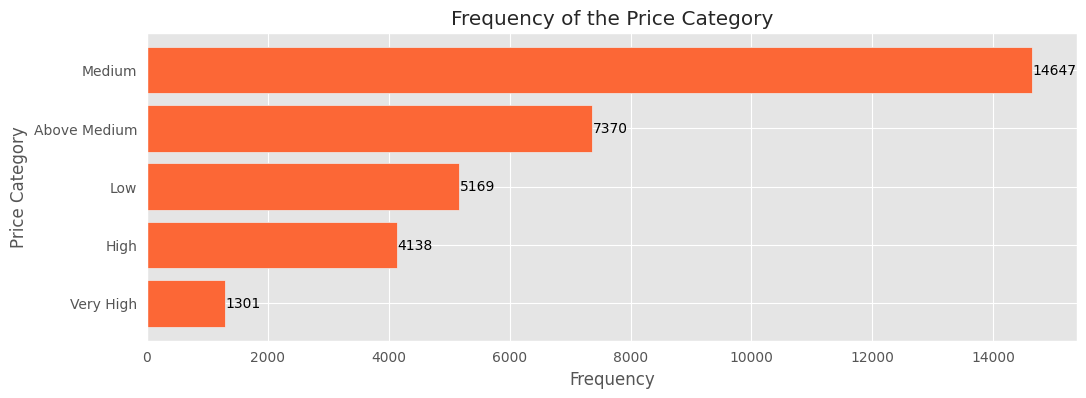

In [18]:
# Plot the frequency of each price category
price_category = df['Price Category'].value_counts().iloc[::-1]
horizontal_bar_plot_with_labels(price_category, xlabel='Frequency', ylabel='Price Category', title='Frequency of the Price Category', color='#FC6736')

In [19]:
# Calculate the average price for each price category and convert it to DataFrame
avg_price_by_category = df.groupby('Price Category', observed=False)['Price'].mean()
avg_price_df = pd.DataFrame({'Price Category': avg_price_by_category.index, 'Average Price': avg_price_by_category.values})
avg_price_df

,Price Category,Average Price
0,Low,1.900207e+05
1,Medium,5.287344e+05
2,Above Medium,1.030116e+06
3,High,2.036591e+06
4,Very High,4.914762e+06


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

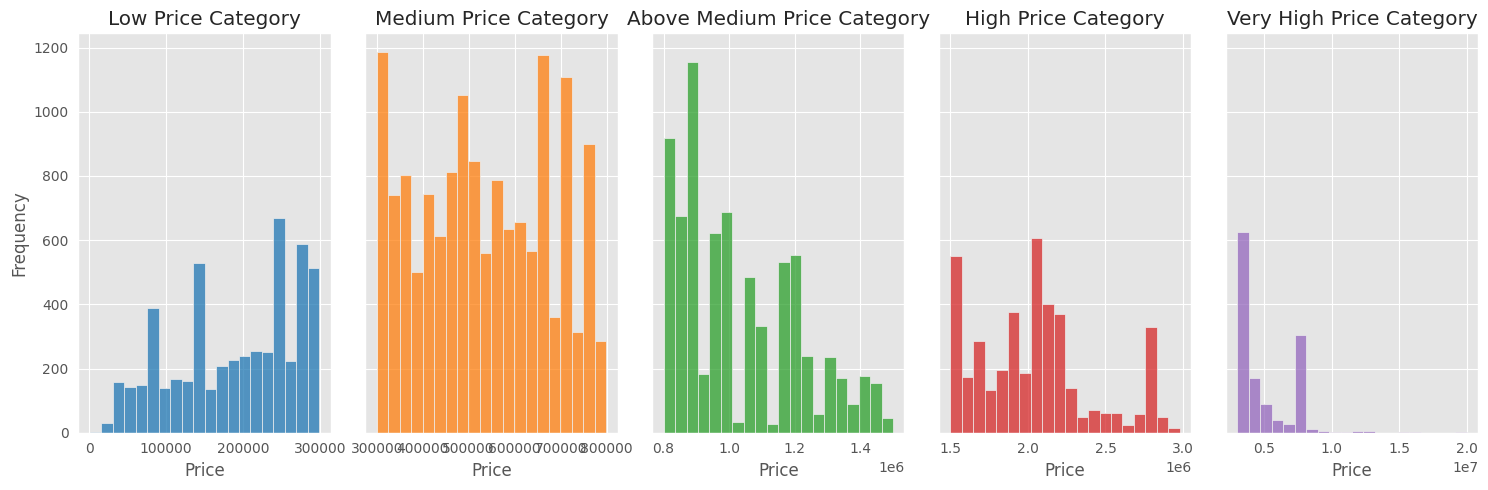

In [20]:

# Define price range categories and corresponding colors
price_categories = ['Low', 'Medium', 'Above Medium', 'High', 'Very High']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create subplots for each price category
fig, axes = plt.subplots(nrows=1, ncols=len(price_categories), figsize=(15, 5), sharey=True)

# Plot histogram for each price category
for i, category in enumerate(price_categories):
    sns.histplot(data=df[df['Price Category'] == category], x='Price', ax=axes[i], color=colors[i], bins=20)
    axes[i].set_title(f'{category} Price Category')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


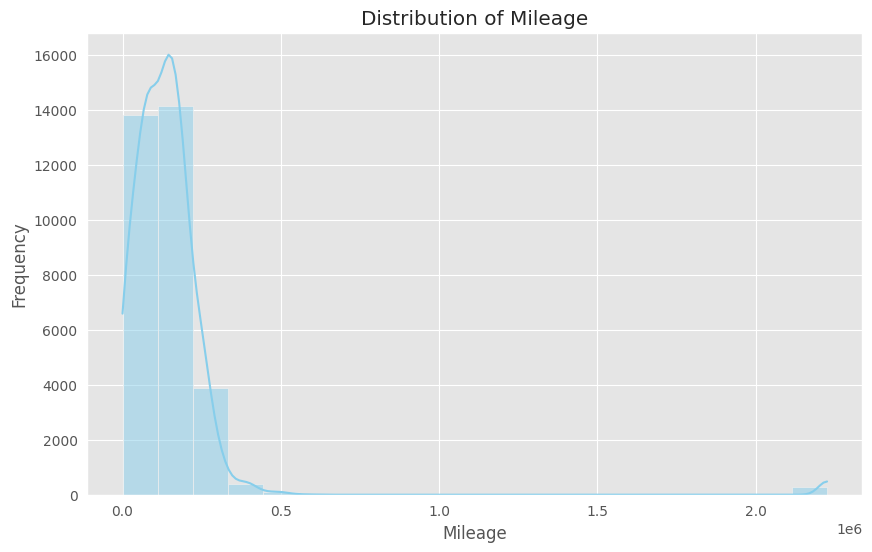

In [21]:
# Create the histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Mileage'], bins=20, color='skyblue', kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

# Conclusion

In conclusion, this analysis provided insights into the used car market in Egypt. We observed the distribution of prices and mileage, explored the popularity of different car brands, and identified trends in price categories. Further analysis could include predictive modeling to estimate car prices based on various features.

# Made by: Abdelrahman Eldaba 👨‍💻

Check out my website with a portfolio [Here](https://sites.google.com/view/abdelrahman-eldaba110) 🌟

Connect with me on [LinkedIn](https://www.linkedin.com/in/abdelrahman-eldaba-739805192/) 🌐

Look at my [GitHub](https://github.com/Abdelrahman47-code) 🚀